In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Titanik gemisinin batması sonucunda hayatta kalan, ölen yolcuların, yolcu sınıfı, beraberinde yolculuk ettiği akraba ve aileler, cinsiyet, yaş gibi bilgilerin olduğu  1309 yolcu verisi ile çalışma yapıldı.


In [37]:
#Titanic veri seti içeri alındı
Titanic_df = pd.read_csv("Titanic_Data.csv")


*# Data dosyası içindeki kolon açıklamları:*

1.   **PassengerId =>** Yolcu numarası (unique id number to each passenger=her yolcu için benzersiz kimlik numarası)
2.   **Survived =>** Yolcu hayatta mı ? (0 = Vefat eden, 1 = Hayatta kalmış) survive(1) or died(0)
3.   **Pclass =>** Yolcu sınıfları = passenger class
4.   **Name =>** Yolcunun adı = name
5.   **Sex =>** Yolcunun cinsiyeti = gender of passenger
6.   **Age =>** Yolcunun yaşı = age of passenger
7.   **SibSp =>** Yolcunun gemide bulunan kardeşleri yada eşleri = number of siblings/spouses
8.   **Parch =>** Yolcunun gemide bulunan anne, babası yada çocukları = number of parents/children
9.   **Ticket =>** Yolcunun bilet numarası = ticket number
10.  **Fare =>**Yolcunun bilet fiyatı = amount of money spent on ticket
11.   **Cabin =>** Yolcunun kabin numarası = cabin category
12.   **Embarked =>** Yolcunun gemiye bindiği liman = port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [38]:
Titanic_df.shape
Titanic_df.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [39]:
#PassengerId sütununu string'e çeviriyoruz; bu sütun modelleme için kullanılmayacak
Titanic_df.PassengerId=Titanic_df.PassengerId.astype("str")

In [40]:
print(Titanic_df.head())

  PassengerId  Survived  Pclass  \
0           1       0.0       3   
1           2       1.0       1   
2           3       1.0       3   
3           4       1.0       1   
4           5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [41]:
Titanic_df.dtypes

,0
PassengerId,object
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [42]:
# "Sex" sütununu kategorik veri türüne dönüştürüyoruz ve ardından sayısal kodlara çeviriyoruz.
Titanic_df['Sex'] = Titanic_df['Sex'].astype('category')
#"male" ve "female" değerlerini sayısal (1, 0) yapıyoruz
Titanic_df['Sex'] = Titanic_df['Sex'].cat.codes

In [43]:
Titanic_df.dtypes

,0
PassengerId,object
Survived,float64
Pclass,int64
Name,object
Sex,int8
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [44]:
print(Titanic_df.head())

  PassengerId  Survived  Pclass  \
0           1       0.0       3   
1           2       1.0       1   
2           3       1.0       3   
3           4       1.0       1   
4           5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [45]:
# Tüm veri çerçevesindeki eksik değerlerin toplamını hesaplıyoruz
Titanic_df.isnull().sum().sum()

1698

In [46]:
# Kullanılmayacak sütunları veri çerçevesinden kaldırıyoruz
Titanic_drop_df = Titanic_df.drop(columns=['Cabin','Name','Embarked','Ticket'])

In [47]:
print(Titanic_drop_df.head())

  PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           1       0.0       3    1  22.0      1      0   7.2500
1           2       1.0       1    0  38.0      1      0  71.2833
2           3       1.0       3    0  26.0      0      0   7.9250
3           4       1.0       1    0  35.0      1      0  53.1000
4           5       0.0       3    1  35.0      0      0   8.0500


In [48]:
#Eksik değerlerin durumunu kontrol ediyoruz
Titanic_drop_df.isnull().sum().sum()

682

In [49]:
missing_counts = Titanic_drop_df.isnull().sum()
print(missing_counts)

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
dtype: int64


In [67]:
# Yaş sütunundaki eksik değerleri sütunun ortalama değeriyle dolduruyoruz
Titanic_drop_df["Age"].fillna(Titanic_drop_df["Age"].mean(), inplace=True)

<ipython-input-67-22c9c7f47e3c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic_drop_df["Age"].fillna(Titanic_drop_df["Age"].mean(), inplace=True)


In [51]:
missing_counts = Titanic_drop_df.isnull().sum()
print(missing_counts)

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
dtype: int64


In [52]:
# Hayatta kalma sütunundaki eksik değerleri "0" (ölüm) ile dolduruyoruz
Titanic_drop_df['Survived'].fillna(0, inplace = True)

<ipython-input-52-d8d096abe3e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic_drop_df['Survived'].fillna(0, inplace = True)


In [53]:
missing_counts = Titanic_drop_df.isnull().sum()
print(missing_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64


In [54]:
# Fare sütunundaki eksik değerleri Pclass (bilet sınıfı) gruplarının ortalamalarıyla dolduruyoruz
Titanic_drop_df["Fare"] = Titanic_drop_df.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

In [55]:
missing_counts = Titanic_drop_df.isnull().sum()
print(missing_counts)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [56]:
print(Titanic_drop_df.head())

  PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           1       0.0       3    1  22.0      1      0   7.2500
1           2       1.0       1    0  38.0      1      0  71.2833
2           3       1.0       3    0  26.0      0      0   7.9250
3           4       1.0       1    0  35.0      1      0  53.1000
4           5       0.0       3    1  35.0      0      0   8.0500


In [57]:
# Bar grafiği çizen bir fonksiyon tanımlıyoruz
def barPlot(feature):
    # Özelliği al
    temp = Titanic_drop_df[feature]

    # Değerleri dönüştürme: "Sex" için 0 -> "Female", 1 -> "Male"; "Survived" için 0 -> "Death", 1 -> "Alive"
    if feature == 'Sex':
        temp = temp.replace({0: 'Female', 1: 'Male'})
    elif feature == 'Survived':
        temp = temp.replace({0: 'Death', 1: 'Alive'})

    # Kategorik değişkenin sayısını hesapla
    tempValue = temp.value_counts()

    # Görselleştir
    plt.figure(figsize=(9, 3))
    plt.bar(tempValue.index, tempValue)
    plt.xticks(tempValue.index, tempValue.index.values)
    plt.ylabel("Yolcu Sayısı")
    plt.title(feature)
    plt.show()

    # Sonuçları yazdır
    print("{}: \n {}".format(feature, tempValue))

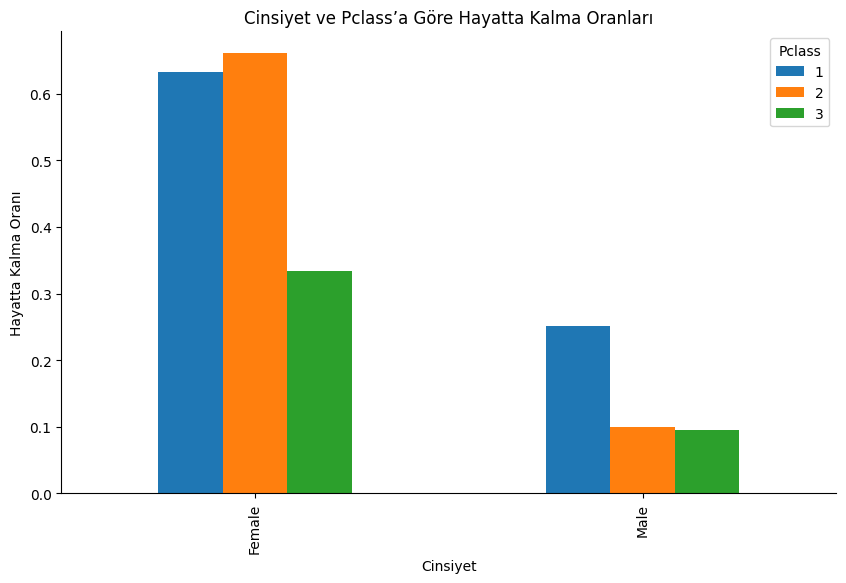

In [58]:
# Cinsiyet ve Pclass'a göre hayatta kalma oranlarını gruplama
survival_rates = Titanic_drop_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

# Cinsiyet değerlerini değiştirme (0 -> Female, 1 -> Male)
survival_rates.index = survival_rates.index.map({0: 'Female', 1: 'Male'})

# Gruplandırılmış hayatta kalma oranlarını çizme
survival_rates.plot(kind='bar', figsize=(10, 6), title='Cinsiyet ve Pclass’a Göre Hayatta Kalma Oranları')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalma Oranı')
plt.legend(title='Pclass')
plt.show()

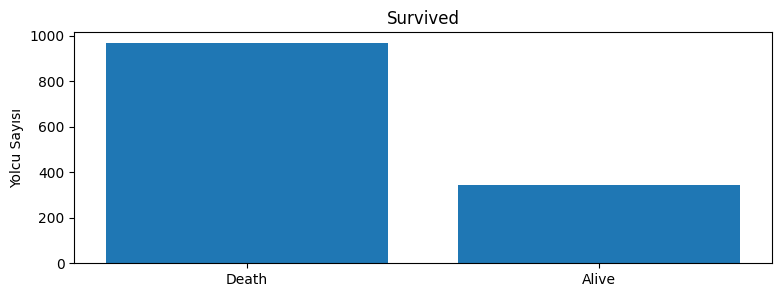

Survived: 
 Survived
Death    967
Alive    342
Name: count, dtype: int64


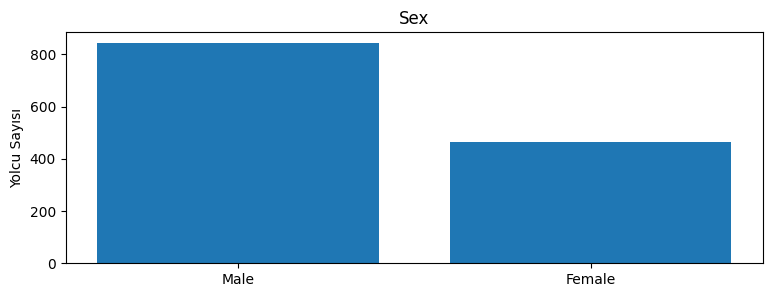

Sex: 
 Sex
Male      843
Female    466
Name: count, dtype: int64


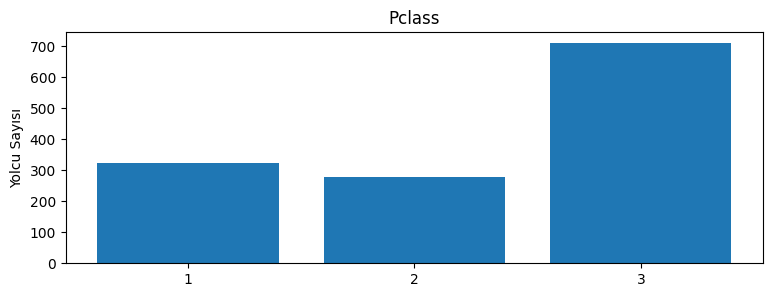

Pclass: 
 Pclass
3    709
1    323
2    277
Name: count, dtype: int64


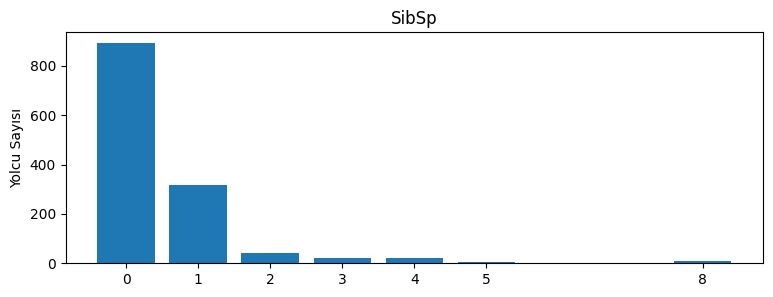

SibSp: 
 SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


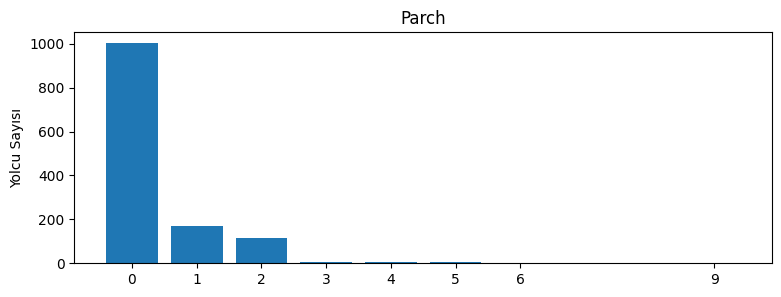

Parch: 
 Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


In [59]:
category = ["Survived", "Sex", "Pclass", "SibSp", "Parch"]
for c in category:
    barPlot(c)

In [60]:
# Ortalama yaşları Pclass’a göre pivot tablo olarak gösteriyoruz
Titanic_drop_df.pivot_table(values='Age', index='Pclass', aggfunc='mean')

# Ortalama ücretleri Pclass’a göre pivot tablo olarak gösteriyoruz
Titanic_drop_df.pivot_table(values='Fare', index='Pclass', aggfunc='mean')


,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [61]:
# Cinsiyet ve Pclass'a göre hayatta kalanların toplam sayısını pivot tablo olarak gösteriyoruz
Titanic_drop_df.pivot_table(values='Survived', index=['Pclass', 'Sex'], aggfunc='sum')

Survived
Pclass Sex          
1      0        91.0
       1        45.0
2      0        70.0
       1        17.0
3      0        72.0
       1        47.0

In [62]:
Titanic_drop_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0.0,3,1,22.000000,1,0,7.2500
1,2,1.0,1,0,38.000000,1,0,71.2833
2,3,1.0,3,0,26.000000,0,0,7.9250
3,4,1.0,1,0,35.000000,1,0,53.1000
4,5,0.0,3,1,35.000000,0,0,8.0500
5,6,0.0,3,1,29.881138,0,0,8.4583
6,7,0.0,1,1,54.000000,0,0,51.8625
7,8,0.0,3,1,2.000000,3,1,21.0750
8,9,1.0,3,0,27.000000,0,2,11.1333
9,10,1.0,2,0,14.000000,1,0,30.0708


In [63]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error , mean_absolute_error

# 'Survived' dışında kalanlar
X = Titanic_drop_df.drop(columns=['Survived'], axis=1)
# Hedef değişken: Survived
y = Titanic_drop_df['Survived']


# Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluştur ve eğit
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Tahminleme
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Hayatta kalma olasılıkları

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Sınıflandırma raporunu oluşturma
classification_report_result = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print(f"Doğruluk Oranı (Accuracy): {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report_result)

# Hayatta kalma olasılıkları
sample_probs = pd.DataFrame({
    'Olasılık': y_prob[:10],
    'Tahmin': y_pred[:10],
    'Gerçek': y_test.iloc[:10].values
})
print(sample_probs)

Doğruluk Oranı (Accuracy): 0.8550
Mean Squared Error (MSE): 0.1450
Mean Absolute Error (MAE): 0.1450

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       189
         1.0       0.82      0.62      0.70        73

    accuracy                           0.85       262
   macro avg       0.84      0.78      0.80       262
weighted avg       0.85      0.85      0.85       262

   Olasılık  Tahmin  Gerçek
0  0.012634     0.0     0.0
1  0.074375     0.0     0.0
2  0.019454     0.0     0.0
3  0.063317     0.0     0.0
4  0.087764     0.0     0.0
5  0.545288     1.0     0.0
6  0.108021     0.0     0.0
7  0.606861     1.0     1.0
8  0.136216     0.0     0.0
9  0.181975     0.0     1.0


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Veriyi ayrıştırma (önceden 'Titanic_drop_df' verisinin hazır olduğu varsayıldı)
X = Titanic_drop_df.drop(columns=['Survived'], axis=1)
y = Titanic_drop_df['Survived']

# Veri ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier modelini oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Tahminleme
y_pred = rf_model.predict(X_test)

# Performans değerlendirmesi
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Sonuçları yazdırma
print(f"Doğruluk Oranı (Accuracy): {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı (Accuracy): 0.8893
Mean Squared Error (MSE): 0.1107
Mean Absolute Error (MAE): 0.1107

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       189
         1.0       0.84      0.74      0.79        73

    accuracy                           0.89       262
   macro avg       0.87      0.84      0.86       262
weighted avg       0.89      0.89      0.89       262



In [65]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error

# Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Modeli (k=5 olarak varsayılan değerle)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Tahminleme
y_pred_knn = knn.predict(X_test)

# Performans değerlendirmesi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

# Sonuçları yazdırma
print(f"Doğruluk Oranı (Accuracy): {accuracy_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_knn))

Doğruluk Oranı (Accuracy): 0.7710
Mean Squared Error (MSE): 0.2290
Mean Absolute Error (MAE): 0.2290

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       189
         1.0       0.64      0.41      0.50        73

    accuracy                           0.77       262
   macro avg       0.72      0.66      0.68       262
weighted avg       0.75      0.77      0.75       262



In [66]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error

# Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Modeli
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)

# Tahminleme
y_pred_dtc = dtc.predict(X_test)

# Performans değerlendirmesi
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
mse = mean_squared_error(y_test, y_pred_dtc)
mae = mean_absolute_error(y_test, y_pred_dtc)

# Sonuçları yazdırma
print(f"Doğruluk Oranı (Accuracy): {accuracy_dtc:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_dtc))

Doğruluk Oranı (Accuracy): 0.8550
Mean Squared Error (MSE): 0.1450
Mean Absolute Error (MAE): 0.1450

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       189
         1.0       0.75      0.71      0.73        73

    accuracy                           0.85       262
   macro avg       0.82      0.81      0.82       262
weighted avg       0.85      0.85      0.85       262

